# MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

import shap
import numpy as np
from tqdm.notebook import tqdm

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# mnist的SHAP
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
y_test[:10]
# [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [17]:
# model_name = "sentiment-lstm"
model_name = "Lipo"
# model_name = "mnist_sep_act_m7_9876"
# model = keras.models.load_model(f'./model/{model_name}.h5')
model = keras.models.load_model(f'./testRNN/models/{model_name}.h5')

ValueError: Unknown metric function: 'rmse'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [11]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           1600000   
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1653301 (6.31 MB)
Trainable params: 1653301 (6.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 53301 (208.21 KB)
Trainable params: 53301 (208.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 5000, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [23]:
shap_test_data = x_test[0:5]
shap_values = e.shap_values(shap_test_data)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: in user code:

    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 247, in grad_graph  *
        out = self.model(shap_rAnD)
    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 370, in custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefix before the lookup
    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 662, in handler
        return linearity_with_excluded_handler(input_inds, explainer, op, *grads)
    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 669, in linearity_with_excluded_handler
        assert not explainer._variable_inputs(op)[i], str(i) + "th input to " + op.name + " cannot vary!"
    File "c:\Users\User\scoop\apps\python\current\Lib\site-packages\shap\explainers\_deep\deep_tf.py", line 224, in _variable_inputs
        out[i] = t.name in self.between_tensors

    AttributeError: Exception encountered when calling layer 'lstm_1' (type LSTM).
    
    'TFDeep' object has no attribute 'between_tensors'
    
    Call arguments received by layer 'lstm_1' (type LSTM):
      • inputs=tf.Tensor(shape=(10000, 28, 28), dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


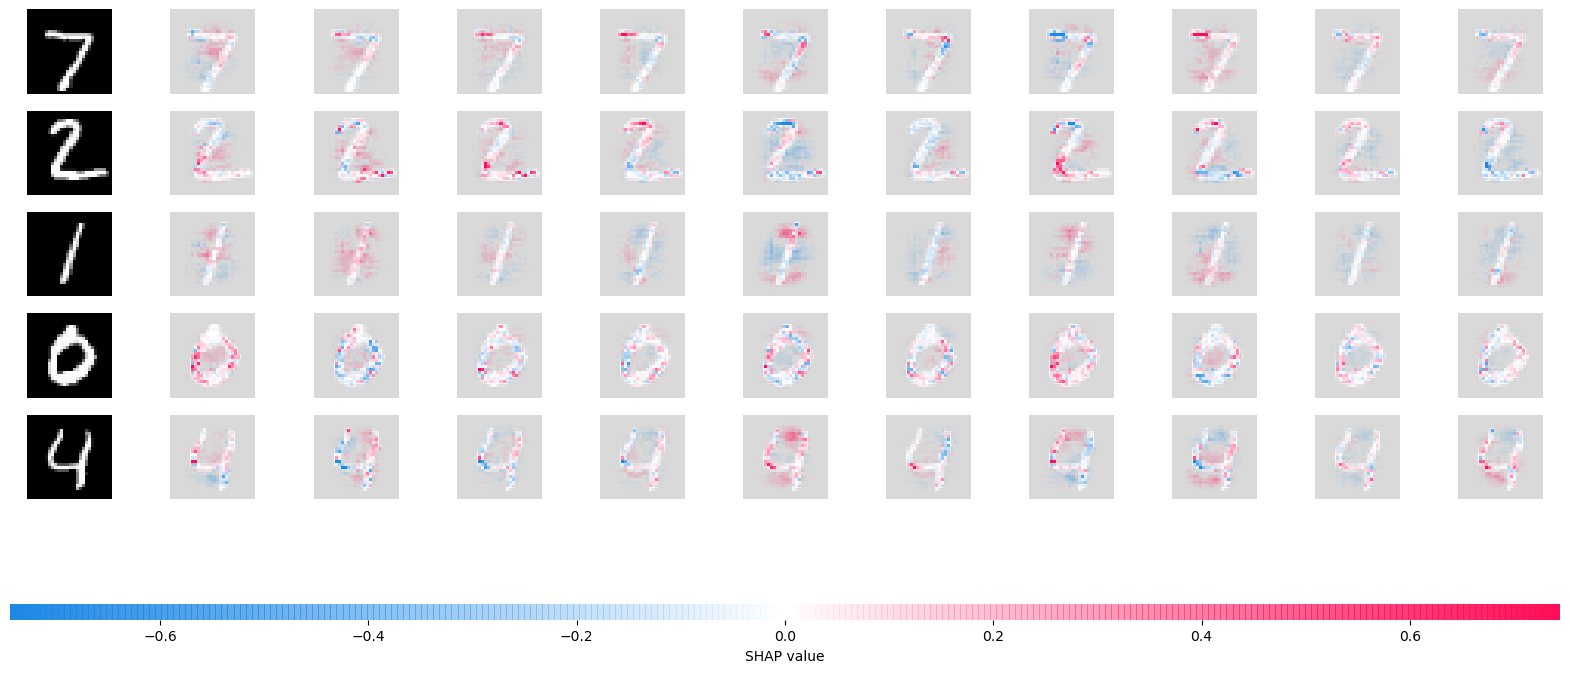

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values, shap_test_data)

In [24]:
def print_shape_list(x):
    try:
        print(len(x), end=' ')
        print_shape_list(x[0])
    except:
        pass

print_shape_list(shap_values)

NameError: name 'shap_values' is not defined

In [25]:
shap_value_list = []
for i in tqdm(range(0, len(y_test), 5)):
    shap_test_data = x_test[i:i+5]
    shap_values = e.shap_values(shap_test_data)

    for j in range(len(shap_test_data)):
        img_idx = i+j
#         print(img_idx)
        label = y_test[img_idx]
        shap_value = shap_values[label][j]

        shap_value_list.append(shap_value)

shap_value_list = np.array(shap_value_list)
assert len(shap_value_list) == len(y_test)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
import os
# os.mkdir(f"./shap_value/{model_name}")
np.save(f"./shap_value/{model_name}/mnist_shap_value.npy", shap_value_list)

In [ ]:
n, h, w, c = shap_value_list.shape
sort_shap_pixel = []

for i in tqdm(range(n)):
    img_dict = dict()
    for j in range(h):
        for k in range(w):
            for l in range(c):
                img_dict[(j, k, l)] = shap_value_list[i, j, k, l]

    img_dict = sorted(img_dict.items(), key=lambda x:x[1], reverse=True)
    pixels, _ = zip(*img_dict)
    sort_shap_pixel.append(pixels)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
sort_shap_pixel = np.array(sort_shap_pixel)
sort_shap_pixel.shape

(10000, 784, 3)

In [ ]:
np.save(f"./shap_value/{model_name}/mnist_sort_shap_pixel.npy", sort_shap_pixel)

In [ ]:
tmp = np.load("./shap_value/mnist_sep_act_m6_9628/mnist_sort_shap_pixel.npy")
tmp.shape

In [ ]:
tmp[:, :, 2].sum()

In [ ]:
value_list = [1, 10, 30, 50]

for value in value_list:
count = [1]*10
for a in range(200):
    print(5*a,'~',5*a+5)
    shap_test_data = x_test[5*a:5*a+5]
    shap_values = e.shap_values(shap_test_data)
    for b in range(5):
        #存image資料(中研院要的格式)依照shap
        save_shap=[[28,28,1,value]]
        tmp = []
        tmp_class = int(y_test[5*a+b])
        test = shap_values[tmp_class][b]
        for k in range(1):
            for i in range(28):
                for j in range(28):
                    tmp.append(x_test[5*a+b][i][j][k])
                save_shap.append(tmp)
                tmp = []
        for c in range(value):
            save_shap.append(np.unravel_index(np.argmax(test), test.shape))
            test[np.unravel_index(np.argmax(test), test.shape)] = -100

        file = open('./mnist/'+str(value)+'/shap/'+str(tmp_class)+'_'+str(count[tmp_class])+'_shap.in','w+')
        for l in range(len(save_shap)):
            for m in range(len(save_shap[l])):
                file.write(str(save_shap[l][m]))
                if l == 0 and m != len(save_shap[l])-1:
                    file.write(', ')
                elif m != len(save_shap[l])-1:
                    file.write(' ')
            file.write('\n')
        file.close()
        count[tmp_class] += 1

In [ ]:
value_list = [1, 10, 30, 50]

for value in value_list:
    count = [1]*10
    for a in range(200):
        print(5*a,'~',5*a+5)
        shap_test_data = x_test[5*a:5*a+5]
        shap_values = e.shap_values(shap_test_data)
        for b in range(5):
            #存image資料(中研院要的格式)依照shap
            save_shap=[[28,28,1,value]]
            tmp = []
            tmp_class = int(y_test[5*a+b])
            test = shap_values[tmp_class][b]
            for k in range(1):
                for i in range(28):
                    for j in range(28):
                        tmp.append(x_test[5*a+b][i][j][k])
                    save_shap.append(tmp)
                    tmp = []
            for c in range(value):
                save_shap.append(np.unravel_index(np.argmax(test), test.shape))
                test[np.unravel_index(np.argmax(test), test.shape)] = -100

            file = open('./mnist/'+str(value)+'/shap/'+str(tmp_class)+'_'+str(count[tmp_class])+'_shap.in','w+')
            for l in range(len(save_shap)):
                for m in range(len(save_shap[l])):
                    file.write(str(save_shap[l][m]))
                    if l == 0 and m != len(save_shap[l])-1:
                        file.write(', ')
                    elif m != len(save_shap[l])-1:
                        file.write(' ')
                file.write('\n')
            file.close()
            count[tmp_class] += 1